<p style="height:100px;line-height:100px;background-color:cyan;text-align:center;font-size:52px;font-family:serif;font-weight:bold;color:black;border-radius:12px;">
    Titanic Disaster
</p>

# **1.**
<p style="height:80px;line-height:80px;background-color:lime;padding-left:12px;font-size:36px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:10px;">
    Importing Libraries & Data
</p>

In [204]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from CHE_Functions.GeneralFunctions import *

In [205]:
datasets_dir = "Datasets"

In [206]:
train_data = pd.read_csv(f"{datasets_dir}/train.csv")
test_data  = pd.read_csv(f"{datasets_dir}/test.csv")

In [207]:
df_train = train_data.copy()

**Explore Data**

In [208]:
df_train.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S


In [209]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [210]:
df_train.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [211]:
df_train.shape

(891, 12)

# **2.**
<p style="height:80px;line-height:80px;background-color:lime;padding-left:12px;font-size:36px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:10px;">
    Cleaning Data
</p>

In [212]:
getMissingValues(df_train)

,Count,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [213]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **2.1**
<p style="height:60px;line-height:60px;background-color:navy;padding-left:12px;font-size:32px;font-family:serif;font-weight:bold;color:white;border:1px outset gold;border-radius:8px;">
    NaN Values & Unnecessary Features
</p>

### **2.1.1**
<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    PassengerId, Name, Cabin & Ticket Features
</p>

In [214]:
# Drop Unnecessary Columns
df_train = df_train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

In [215]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### **2.1.2**
<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    Age Feature
</p>

#### **Checking 'Age' Feature For Fill NaN Values**

In [216]:
df_train.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [217]:
df_train.groupby(['Sex', 'Pclass'])['Age'].mean().unstack()

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [218]:
df_train.groupby(['Sex', 'Survived', 'Pclass'])['Age'].mean().unstack()

Pclass                   1          2          3
Sex    Survived                                 
female 0         25.666667  36.000000  23.818182
       1         34.939024  28.080882  19.329787
male   0         44.581967  33.369048  27.255814
       1         36.248000  16.022000  22.274211

#### **Fill NaN Values in 'Age' Feature**

In [219]:
# Female & Unsurvived & Pclass 1
df_train[(df_train['Sex']=='female') & (df_train['Survived']==0) & (df_train['Pclass']==1)] = \
    df_train[(df_train['Sex']=='female') & (df_train['Survived']==0) & (df_train['Pclass']==1)].fillna(value={'Age':26})
# Female & Unsurvived & Pclass 2
df_train[(df_train['Sex']=='female') & (df_train['Survived']==0) & (df_train['Pclass']==2)] = \
    df_train[(df_train['Sex']=='female') & (df_train['Survived']==0) & (df_train['Pclass']==2)].fillna(value={'Age':36})
# Female & Unsurvived & Pclass 3
df_train[(df_train['Sex']=='female') & (df_train['Survived']==0) & (df_train['Pclass']==3)] = \
    df_train[(df_train['Sex']=='female') & (df_train['Survived']==0) & (df_train['Pclass']==3)].fillna(value={'Age':24})
# Female & Survived & Pclass 1
df_train[(df_train['Sex']=='female') & (df_train['Survived']==1) & (df_train['Pclass']==1)] = \
    df_train[(df_train['Sex']=='female') & (df_train['Survived']==1) & (df_train['Pclass']==1)].fillna(value={'Age':35})
# Female & Survived & Pclass 2
df_train[(df_train['Sex']=='female') & (df_train['Survived']==1) & (df_train['Pclass']==2)] = \
    df_train[(df_train['Sex']=='female') & (df_train['Survived']==1) & (df_train['Pclass']==2)].fillna(value={'Age':28})
# Female & Survived & Pclass 3
df_train[(df_train['Sex']=='female') & (df_train['Survived']==1) & (df_train['Pclass']==3)] = \
    df_train[(df_train['Sex']=='female') & (df_train['Survived']==1) & (df_train['Pclass']==3)].fillna(value={'Age':19})

In [220]:
# Male & Unsurvived & Pclass 1
df_train[(df_train['Sex']=='male') & (df_train['Survived']==0) & (df_train['Pclass']==1)] = \
    df_train[(df_train['Sex']=='male') & (df_train['Survived']==0) & (df_train['Pclass']==1)].fillna(value={'Age':45})
# Male & Unsurvived & Pclass 2
df_train[(df_train['Sex']=='male') & (df_train['Survived']==0) & (df_train['Pclass']==2)] = \
    df_train[(df_train['Sex']=='male') & (df_train['Survived']==0) & (df_train['Pclass']==2)].fillna(value={'Age':33})
# Male & Unsurvived & Pclass 3
df_train[(df_train['Sex']=='male') & (df_train['Survived']==0) & (df_train['Pclass']==3)] = \
    df_train[(df_train['Sex']=='male') & (df_train['Survived']==0) & (df_train['Pclass']==3)].fillna(value={'Age':27})
# Male & Survived & Pclass 1
df_train[(df_train['Sex']=='male') & (df_train['Survived']==1) & (df_train['Pclass']==1)] = \
    df_train[(df_train['Sex']=='male') & (df_train['Survived']==1) & (df_train['Pclass']==1)].fillna(value={'Age':36})
# Male & Unsurvived & Pclass 2
df_train[(df_train['Sex']=='male') & (df_train['Survived']==1) & (df_train['Pclass']==2)] = \
    df_train[(df_train['Sex']=='male') & (df_train['Survived']==1) & (df_train['Pclass']==2)].fillna(value={'Age':16})
# Male & Unsurvived & Pclass 3
df_train[(df_train['Sex']=='male') & (df_train['Survived']==1) & (df_train['Pclass']==3)] = \
    df_train[(df_train['Sex']=='male') & (df_train['Survived']==1) & (df_train['Pclass']==3)].fillna(value={'Age':22})

In [221]:
# Convert 'Age' to Integer
df_train['Age'] = df_train['Age'].astype('int64')

#### **Fill NaN Values in 'Embarked' Feature**

In [222]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [223]:
# Fill 'Embarked' with the Mode 'S'
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [224]:
df_clean = df_train.copy()

## **2.2**
<p style="height:60px;line-height:60px;background-color:navy;padding-left:12px;font-size:32px;font-family:serif;font-weight:bold;color:white;border:1px outset gold;border-radius:8px;">
    Convert Data to Numerical
</p>

### **2.2.1**
<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    Sex Feature
</p>

In [225]:
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [226]:
# Convert 'Sex' values from 'String' to 'Integer'
sex_map         = {'male'   :1, 'female' :0}
df_train['Sex'] = df_train['Sex'].map(sex_map).astype('int64')

### **2.2.2**
<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    Embarked Feature
</p>

In [227]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [228]:
# Convert 'Embarked' values from 'String' to 'Integer'
embarked_map         = {'S':1, 'C':2, 'Q':3}
df_train['Embarked'] = df_train['Embarked'].map(embarked_map)

# **3.**
<p style="height:80px;line-height:80px;background-color:lime;padding-left:12px;font-size:36px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:10px;">
    Analytics
</p>

## **3.1**
<p style="height:60px;line-height:60px;background-color:navy;padding-left:12px;font-size:32px;font-family:serif;font-weight:bold;color:white;border:1px outset gold;border-radius:8px;">
    Discovering the Data
</p>

#### The main question is :
> **Is there a certain pattern in the distribution of victims, or was everything random?**
> 
> **Then can we prived a prior advice for any similar incident in the future?**
> 
We will see...

### **3.1.1**
<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    Measures & Values
</p>

In [229]:
df_clean.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.294052,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.397088,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN


In [232]:
df_corr = df_train.corr()

In [233]:
df_clean['Count'] = 1

In [234]:
df_clean['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [235]:
df_clean['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [236]:
df_clean['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [237]:
df_clean['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [238]:
df_clean['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [239]:
df_clean['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### **3.1.2**
<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    Visualization
</p>

**`Sex` `Age` `Pclass` `Embarked`**

In [240]:
df_clean.groupby(['Survived', 'Sex', 'Embarked', 'Pclass'])['Survived'].count().unstack()

Pclass                       1     2      3
Survived Sex    Embarked                   
0        female C          1.0   NaN    8.0
                Q          NaN   NaN    9.0
                S          2.0   6.0   55.0
         male   C         25.0   8.0   33.0
                Q          1.0   1.0   36.0
                S         51.0  82.0  231.0
1        female C         42.0   7.0   15.0
                Q          1.0   2.0   24.0
                S         48.0  61.0   33.0
         male   C         17.0   2.0   10.0
                Q          NaN   NaN    3.0
                S         28.0  15.0   34.0

In [241]:
fig = px.bar(df_clean, x='Survived', y='Count', color='Sex', barmode='group', facet_row='Pclass', facet_col='Embarked', height=720)
fig.show()

In [242]:
fig = px.histogram(df_clean, x='Age', color='Sex', facet_row='Pclass', facet_col='Embarked', height=720, nbins=50, opacity=0.6)
fig.show()

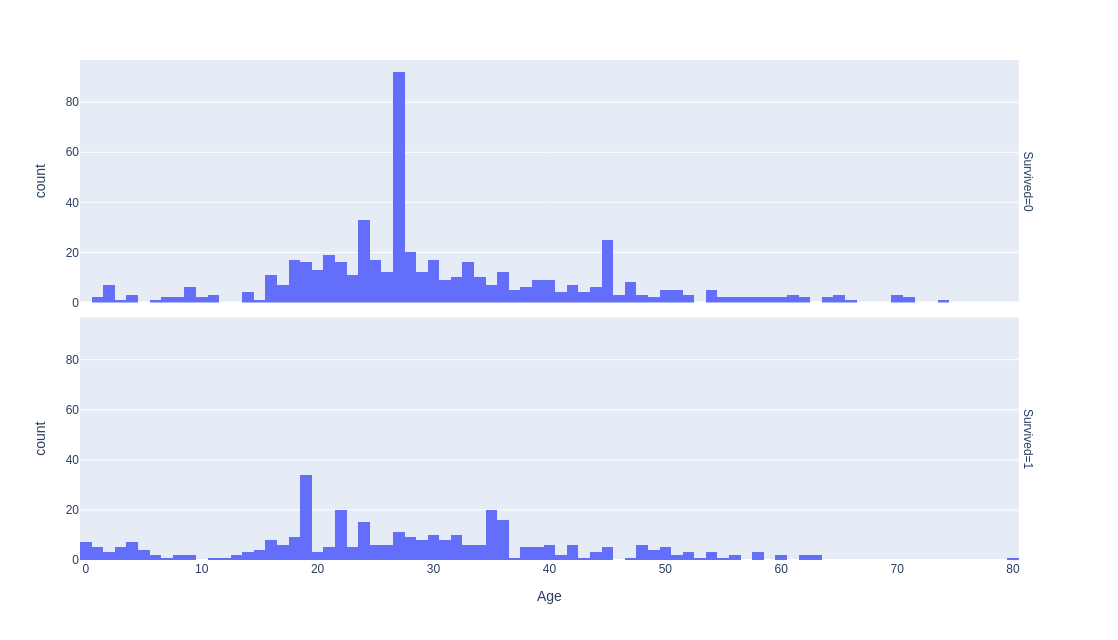

In [249]:
fig = px.histogram(df_clean, x='Age', facet_row='Survived', height=640, nbins=100)
fig.show()

In [243]:
fig = px.box(df_clean, y='Age', height=600)
fig.show()

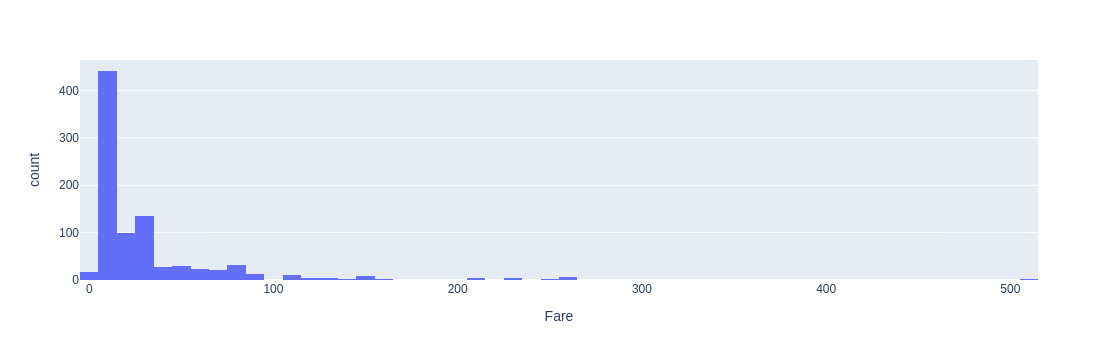

In [244]:
fig = px.histogram(df_clean, x='Fare', height=360, nbins=100)
fig.show()

**`Fare`**

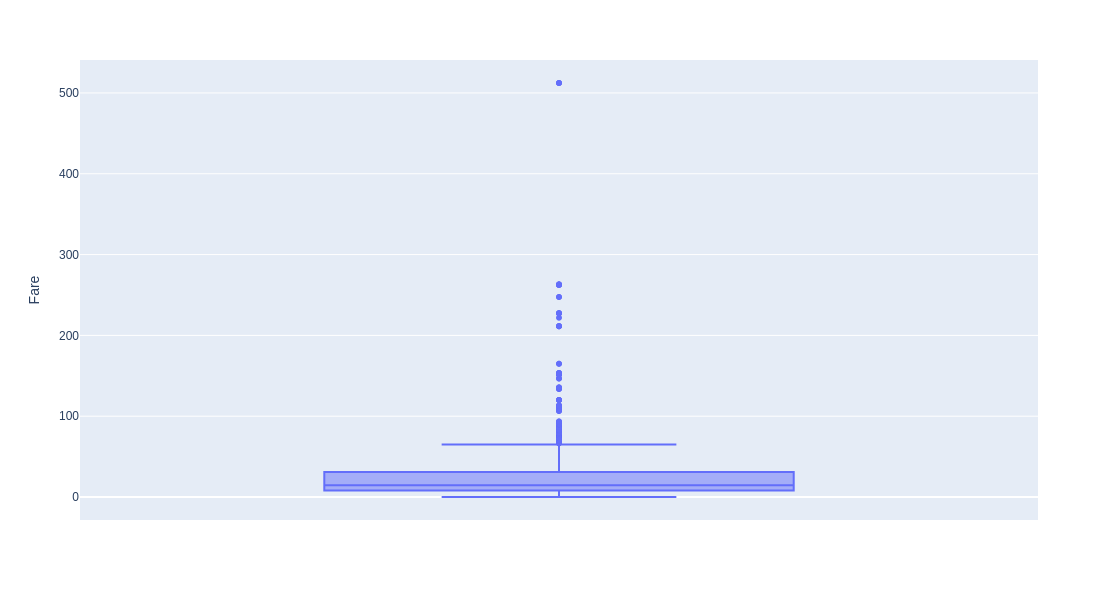

In [245]:
fig = px.box(df_clean, y='Fare', height=600)
fig.show()

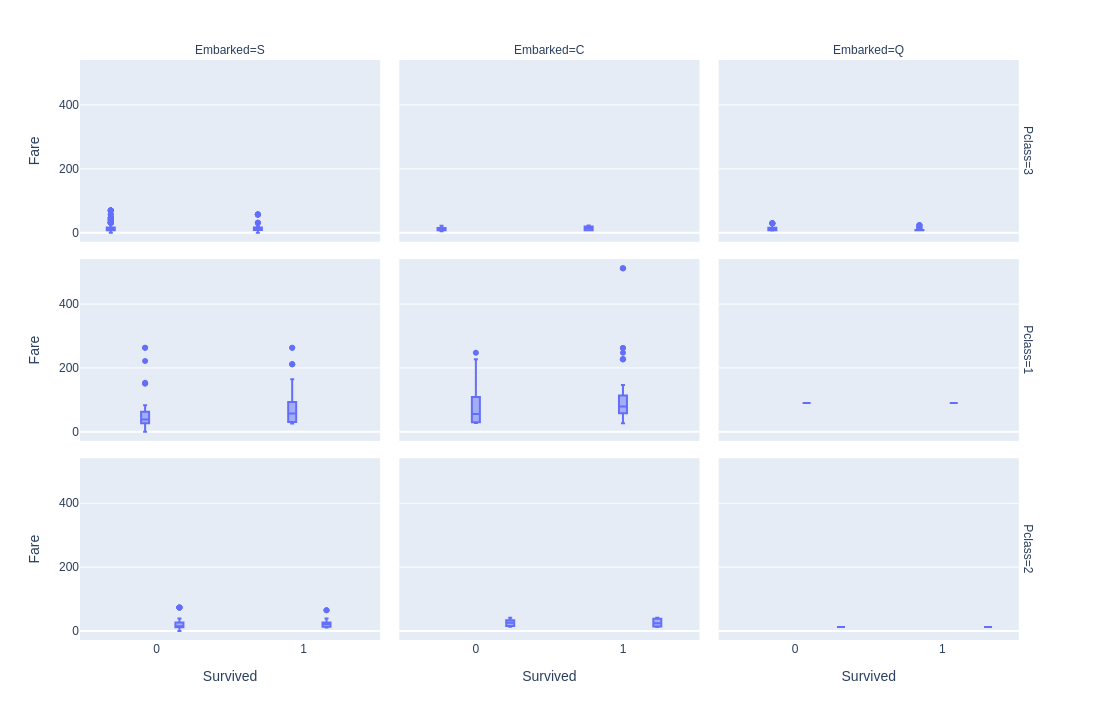

In [246]:
fig = px.box(df_clean, y='Fare', x='Survived', facet_row='Pclass', facet_col='Embarked', height=720)
fig.show()

**`SibSp` `Parch`**

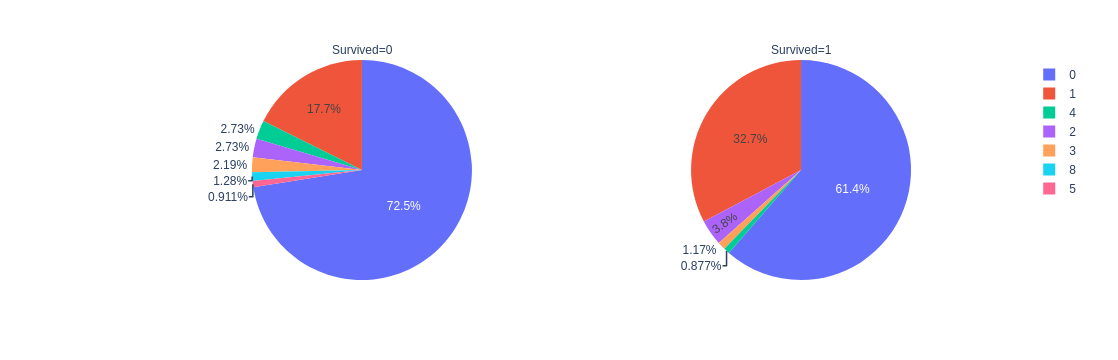

In [269]:
fig = px.pie(df_clean, names='SibSp', facet_col='Survived')
fig.show()

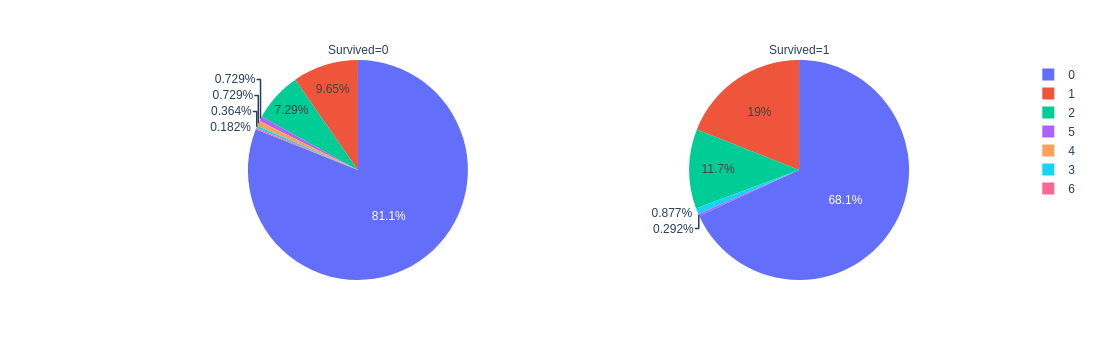

In [270]:
fig = px.pie(df_clean, names='Parch', facet_col='Survived')
fig.show()

# **Kaggle : [Tarek Ghajary]() | GitHub : [CHESyrian](www.github.com/CHESyrian) | Linkedin : [Tarek Ghajary]()**
<p style="height:240px;line-height:100px;font-size:64px;background-color:cyan;color:white;padding:20px auto;text-align:center;border:2px outset gold;border-radius:8px;">
    Created by:<br/> <code style="border:1px outset gold;border-radius:10px;">Tarek Ghajary</code>
</p>